# Purpose is to find correlation between each feature with "Strength" 
# and what feature worth furtherly tuning to optmise "strength"

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(path)

In [2]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
## get basic information about dataset
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
df[df['Fly Ash']==0]['Fly Ash'].count() ##check 0 value

566

In [5]:
df[df['Superplasticizer']==0]['Superplasticizer'].count() ##check 0 value

379

## Check first impression for correlation about each feature agasint strength

<Axes: xlabel='Age', ylabel='Strength'>

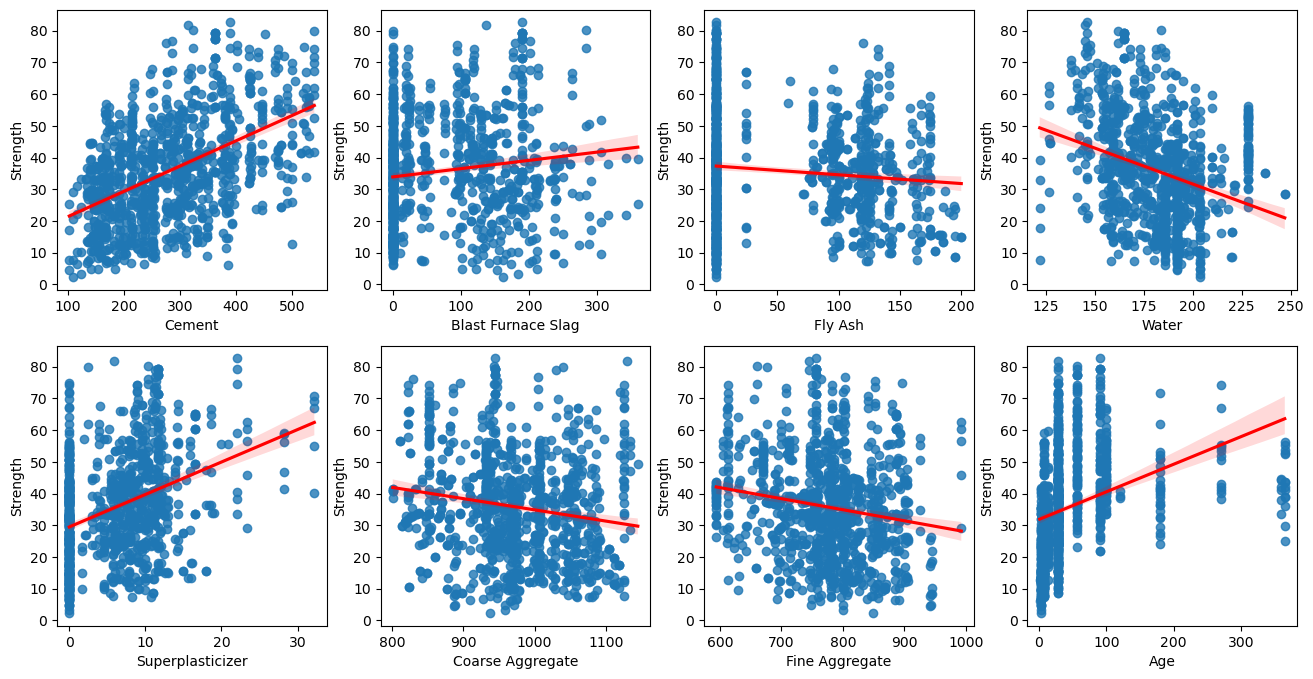

In [6]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) =plt.subplots(2,4, figsize=(16,8))
sns.regplot(df, x='Cement',y='Strength', ax=ax1,line_kws={'color':'red'})
sns.regplot(df, x='Blast Furnace Slag',y='Strength', ax=ax2,line_kws={'color':'red'})
sns.regplot(df, x='Fly Ash',y='Strength', ax=ax3,line_kws={'color':'red'})
sns.regplot(df, x='Water',y='Strength', ax=ax4,line_kws={'color':'red'})
sns.regplot(df, x='Superplasticizer',y='Strength', ax=ax5,line_kws={'color':'red'})
sns.regplot(df, x='Coarse Aggregate',y='Strength', ax=ax6,line_kws={'color':'red'})
sns.regplot(df, x='Fine Aggregate',y='Strength', ax=ax7,line_kws={'color':'red'})
sns.regplot(df, x='Age',y='Strength', ax=ax8,line_kws={'color':'red'})

## Check correlation and r2 among each other to understand relation better

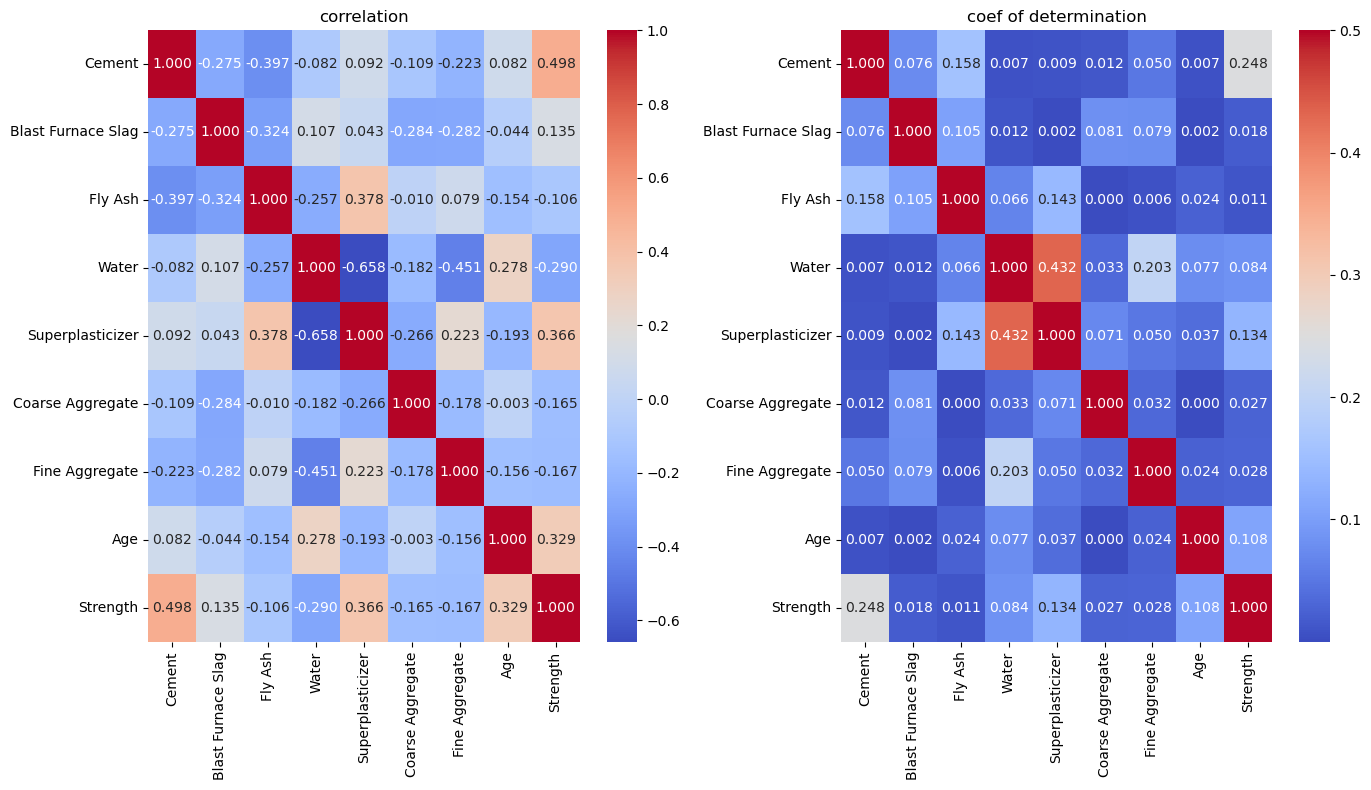

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,8))

sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.3f',ax=ax1)
ax1.set_title('correlation')
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

sns.heatmap(df.corr()**2,cmap='coolwarm',annot=True,fmt='.3f',ax=ax2, vmax=0.5)
ax2.set_title('coef of determination')
# ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
plt.tight_layout()

## Add r2 onto each plots for reference

Text(200, 10, 'R2=0.108')

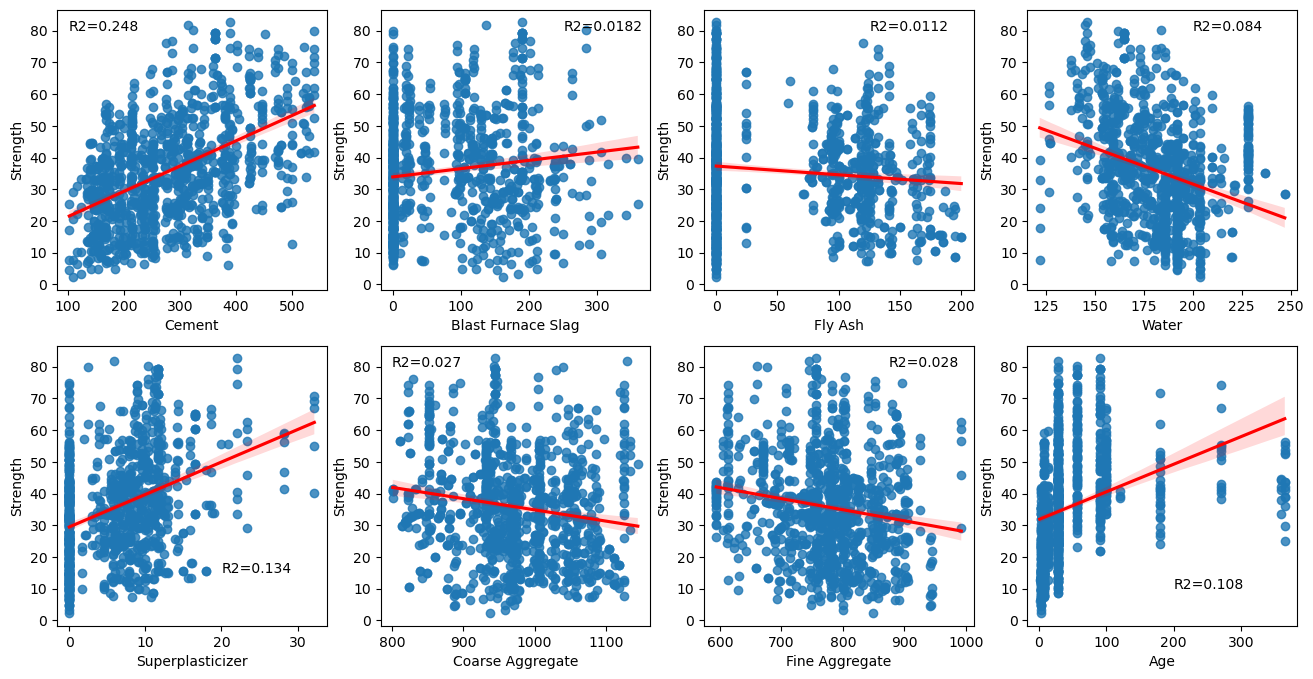

In [8]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) =plt.subplots(2,4, figsize=(16,8))
sns.regplot(df, x='Cement',y='Strength', ax=ax1,line_kws={'color':'red'})
ax1.text(100, 80, 'R2=0.248')

sns.regplot(df, x='Blast Furnace Slag',y='Strength', ax=ax2,line_kws={'color':'red'})
ax2.text(250, 80, 'R2=0.0182')

sns.regplot(df, x='Fly Ash',y='Strength', ax=ax3,line_kws={'color':'red'})
ax3.text(125, 80, 'R2=0.0112')

sns.regplot(df, x='Water',y='Strength', ax=ax4,line_kws={'color':'red'})
ax4.text(200, 80, 'R2=0.084')

sns.regplot(df, x='Superplasticizer',y='Strength', ax=ax5,line_kws={'color':'red'})
ax5.text(20, 15, 'R2=0.134')

sns.regplot(df, x='Coarse Aggregate',y='Strength', ax=ax6,line_kws={'color':'red'})
ax6.text(800, 80, 'R2=0.027')

sns.regplot(df, x='Fine Aggregate',y='Strength', ax=ax7,line_kws={'color':'red'})
ax7.text(875, 80, 'R2=0.028')

sns.regplot(df, x='Age',y='Strength', ax=ax8,line_kws={'color':'red'})
ax8.text(200, 10, 'R2=0.108')

## Select 4 features seeming to have the larger slope and greater r2 value to investigate

In [9]:
dfml = df[['Cement','Water','Superplasticizer','Age']]
dfml.head()

,Cement,Water,Superplasticizer,Age
0,540.0,162.0,2.5,28
1,540.0,162.0,2.5,28
2,332.5,228.0,0.0,270
3,332.5,228.0,0.0,365
4,198.6,192.0,0.0,360


## Start ML to check in deepth

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [11]:
## split train & test dataset
xtrain, xtest, ytrain, ytest = train_test_split(dfml, df['Strength'],test_size=0.2, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(824, 4) (206, 4) (824,) (206,)


In [12]:
LRNS = LinearRegression()

In [13]:
## Feed train dataset and check r2 using unseen test dataset to see how well the trained model could predict unseen value
LRNS.fit(xtrain,ytrain)
ypredict = LRNS.predict(xtest)
print(LRNS.coef_)
print(LRNS.intercept_)
print(LRNS.score(xtest,ytest))

[ 0.06651811 -0.13286294  0.79178857  0.10735202]
31.488292633391637
0.5561498852873195


In [14]:
mean_squared_error(ytest,ypredict)

114.36991912194752

#### R2 is 0.5561498852873195 for 4 features without standardization & MSR is 114.36991912194752

In [15]:
xnsa = df.drop('Strength',axis=1)
ynsa = df['Strength']
LRNS.fit(xnsa,ynsa)
ypredict = LRNS.predict(xnsa)
print(LRNS.coef_)
print(LRNS.intercept_)
print(LRNS.score(xnsa,ynsa))

[ 0.11980433  0.10386581  0.08793432 -0.14991842  0.2922246   0.01808621
  0.02019035  0.11422207]
-23.33121358490346
0.6155198704142721


In [16]:
mean_squared_error(ynsa,ypredict)

107.19723607486016

#### MSR is 107.19723607486016 if include test data to fit in the first place which makes sense becasue it learnt all data before prediction

## Standadise value before fitting into linear regresssion model to see if any improvement

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
LRS = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

In [19]:
LRS.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [20]:
ypredictp = LRS.predict(xtest)
print(LRS.score(xtest,ytest))

0.5561498852873195


#### R2 is 0.5561498852873195 as same as before standardizing

## Then check if selecting more features will have better output and how many features are the best cost perfermance

In [21]:
num_features = df.drop('Strength',axis=1).shape[1]
feature_range = range(1, num_features + 1)
feature_range

range(1, 9)

In [22]:
xnf = df.drop('Strength',axis=1)
ynf = df['Strength']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(xnf, ynf, test_size=0.2, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(824, 8) (206, 8) (824,) (206,)


In [24]:
parameters = {
    'select__k': [i for i in feature_range]  # Search over different numbers of features
}
print(parameters)

{'select__k': [1, 2, 3, 4, 5, 6, 7, 8]}


In [25]:
LRNF = LinearRegression()

In [26]:
from sklearn.feature_selection import SelectKBest, f_regression

In [27]:
pipelinenf = Pipeline([
    ('select', SelectKBest(score_func=f_regression)),
    ('regressor', LinearRegression())
])

In [28]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [29]:
grid_search = GridSearchCV(pipelinenf, parameters, cv=5, scoring=mse_scorer)
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(score_func=<function f_regression at 0x7ff79f14c940>)),
                                       ('regressor', LinearRegression())]),
             param_grid={'select__k': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [30]:
results = pd.DataFrame(grid_search.cv_results_)

In [31]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004422,0.001472,0.001420,0.000180,1,{'select__k': 1},-231.089184,-228.148060,-208.577244,-199.261949,-207.694422,-214.954172,12.442125,8
1,0.003858,0.000211,0.001287,0.000016,2,{'select__k': 2},-226.617698,-212.209697,-176.781378,-181.246190,-184.052348,-196.181462,19.645915,7
2,0.003738,0.000112,0.001283,0.000015,3,{'select__k': 3},-200.029804,-169.662099,-135.987880,-127.580465,-129.763440,-152.604738,28.157236,6
3,0.003759,0.000123,0.001286,0.000021,4,{'select__k': 4},-190.455979,-162.075918,-137.025986,-125.668925,-127.640251,-148.573412,24.627720,5
4,0.003699,0.000063,0.001269,0.000014,5,{'select__k': 5},-185.617976,-162.535243,-133.532578,-118.118205,-124.979992,-144.956799,25.346514,4
5,0.003690,0.000113,0.001304,0.000097,6,{'select__k': 6},-152.707582,-162.551088,-131.317287,-102.735238,-102.563325,-130.374904,24.788620,3
6,0.003665,0.000049,0.001258,0.000022,7,{'select__k': 7},-143.530389,-144.085987,-89.234951,-101.597436,-103.043082,-116.298369,22.969472,2
7,0.003682,0.000040,0.001278,0.000077,8,{'select__k': 8},-139.222962,-142.354592,-87.806116,-97.064828,-107.499000,-114.789500,22.146091,1


## From report above we could see the more features we select the MSE will be better

Text(1, -130, 'Knee Point')

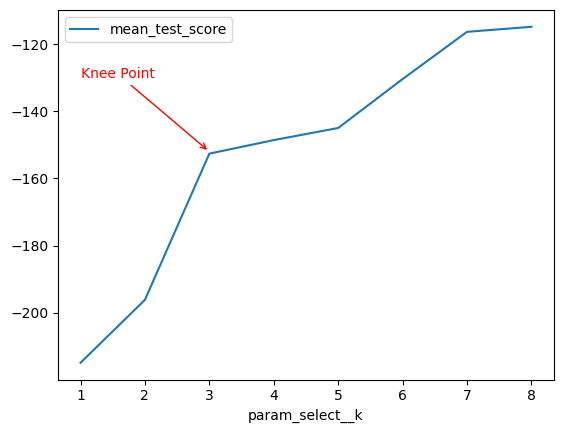

In [32]:
results.plot(y='mean_test_score',x='param_select__k')
plt.annotate('Knee Point', xy=(3, -152), xytext=(1, -130),
             arrowprops=dict(color='red', arrowstyle='->'), color='red')

## We could see at k=3 there is a big slope which could be reckoned as keen point

Text(0.5, 1.0, 'correlation')

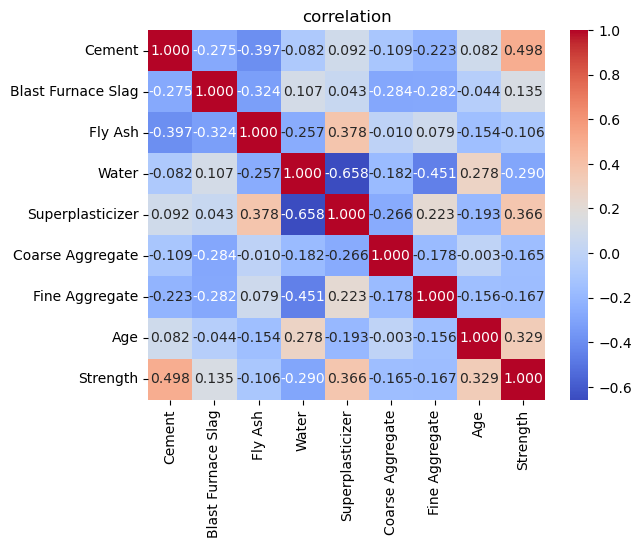

In [33]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.3f')
plt.title('correlation')

## Based on the Knee of mean_test_score curve and correlation 
## ultimately decided to choose ""Cement", "Superplasticizer", "Age"
## which could have bigger impact to optimise target while have controlled resource spent and output